Importing necessary pacakages and data set into dataframe

In [677]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [471]:
cities =  pd.read_csv("C:\\Users\\josh\\OneDrive\\Documents\\technical interview\\world_cities.csv")
# pd.read_csv automatically converts teh csv into a data frame if have a list of dicts or a dict of lists use pd.DataFrame(object) 
#to create dataframe

In [472]:
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [473]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        42905 non-null  object 
 1   city_ascii  42905 non-null  object 
 2   lat         42905 non-null  float64
 3   lng         42905 non-null  float64
 4   country     42905 non-null  object 
 5   iso2        42873 non-null  object 
 6   iso3        42905 non-null  object 
 7   admin_name  42810 non-null  object 
 8   capital     9812 non-null   object 
 9   population  42180 non-null  float64
 10  id          42905 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ MB


Investigating and cleaning data set 

First let's check for any missing or erronous data before performing any analysis 

In [474]:
#seeing which columns have null values 
cities.isna().any()

city          False
city_ascii    False
lat           False
lng           False
country       False
iso2           True
iso3          False
admin_name     True
capital        True
population     True
id            False
dtype: bool

It appears we have a few null values in the iso2 column, admin name, capital, and population columns, lets take a look at those to see what the issue is

In [475]:
#creating a new dataset with only those rows which have null in iso2
nulliso2=cities[cities["iso2"].isnull()]

In [476]:
nulliso2

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
751,Windhoek,Windhoek,-22.5700,17.0836,Namibia,NaN,NAM,Khomas,primary,322500.0,1516802003
5661,Rundu,Rundu,-17.9167,19.7667,Namibia,NaN,NAM,Kavango East,admin,63431.0,1516885937
6400,Oshakati,Oshakati,-17.8000,15.6833,Namibia,NaN,NAM,Oshana,admin,39679.0,1516866759
6703,Swakopmund,Swakopmund,-22.6667,14.5333,Namibia,NaN,NAM,Erongo,admin,34300.0,1516214290
6933,Otjiwarongo,Otjiwarongo,-20.4642,16.6528,Namibia,NaN,NAM,Otjozondjupa,admin,28249.0,1516719545
6968,Katima Mulilo,Katima Mulilo,-17.5000,24.2667,Namibia,NaN,NAM,Zambezi,admin,28699.0,1516068788
7058,Rehoboth,Rehoboth,-23.3167,17.0833,Namibia,NaN,NAM,Hardap,NaN,25219.0,1516928100
7809,Gobabis,Gobabis,-22.4500,18.9667,Namibia,NaN,NAM,Omaheke,admin,16321.0,1516128715
7893,Keetmanshoop,Keetmanshoop,-26.5833,18.1333,Namibia,NaN,NAM,//Karas,admin,16800.0,1516607376
8275,Mariental,Mariental,-24.6333,17.9667,Namibia,NaN,NAM,Hardap,admin,12478.0,1516582394


Appears nambia does not have an iso2 identifier, a quick Google search reveals that the ISO 2 code for nambia should be NA, I wonder if when this dataset was created if that value was incorrectly intrepreted as a null value. Lets make sure NA isnt already in use and if not, fix this problem. 

In [477]:
# subset the dataframe by rows with NA in iso2 and check its length if 0 then its not in use
len(cities[cities["iso2"]=="NA"])

0

No countries in the table are using NA for the ISO 2 code so it should be safe to replace with "NA"  

In [478]:
# since we want to replace all nulls in the iso column with the same value we can use the following line to do so    
cities["iso2"].fillna("NA", inplace=True)

In [479]:
len(cities[cities["iso2"]=="NA"])

32

In [480]:
# making sure NA was placed into the dataframe by subsetting with that value  
cities[cities["iso2"]=="NA"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
751,Windhoek,Windhoek,-22.5700,17.0836,Namibia,NA,NAM,Khomas,primary,322500.0,1516802003
5661,Rundu,Rundu,-17.9167,19.7667,Namibia,NA,NAM,Kavango East,admin,63431.0,1516885937
6400,Oshakati,Oshakati,-17.8000,15.6833,Namibia,NA,NAM,Oshana,admin,39679.0,1516866759
6703,Swakopmund,Swakopmund,-22.6667,14.5333,Namibia,NA,NAM,Erongo,admin,34300.0,1516214290
6933,Otjiwarongo,Otjiwarongo,-20.4642,16.6528,Namibia,NA,NAM,Otjozondjupa,admin,28249.0,1516719545
6968,Katima Mulilo,Katima Mulilo,-17.5000,24.2667,Namibia,NA,NAM,Zambezi,admin,28699.0,1516068788
7058,Rehoboth,Rehoboth,-23.3167,17.0833,Namibia,NA,NAM,Hardap,NaN,25219.0,1516928100
7809,Gobabis,Gobabis,-22.4500,18.9667,Namibia,NA,NAM,Omaheke,admin,16321.0,1516128715
7893,Keetmanshoop,Keetmanshoop,-26.5833,18.1333,Namibia,NA,NAM,//Karas,admin,16800.0,1516607376
8275,Mariental,Mariental,-24.6333,17.9667,Namibia,NA,NAM,Hardap,admin,12478.0,1516582394


In [481]:
#checking again for null values, the iso2 line should say false
cities.isna().any()

city          False
city_ascii    False
lat           False
lng           False
country       False
iso2          False
iso3          False
admin_name     True
capital        True
population     True
id            False
dtype: bool

iso2 no longer has null values so can now be used for analysis without unintentionally not including Nambia. Score.
Lets take a look at the next catagory, admin_name 

In [482]:
#similar to iso2 first we subset by the null values in that column
nulladmin=cities[cities["admin_name"].isnull()]

In [483]:
nulladmin

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
70,Hong Kong,Hong Kong,22.3069,114.1831,Hong Kong,HK,HKG,NaN,primary,7398000.0,1344982653
638,Nouakchott,Nouakchott,18.0858,-15.9785,Mauritania,MR,MRT,NaN,primary,1077169.0,1478414984
758,Nassau,Nassau,25.0667,-77.3333,The Bahamas,BS,BHS,NaN,primary,274400.0,1044318561
760,Fort-de-France,Fort-de-France,14.6104,-61.0800,Martinique,MQ,MTQ,NaN,primary,253995.0,1474969110
767,Gibraltar,Gibraltar,36.1324,-5.3781,Gibraltar,GI,GIB,NaN,primary,187083.0,1292385245
...,...,...,...,...,...,...,...,...,...,...,...
42090,Sinnamary,Sinnamary,5.3800,-52.9600,French Guiana,GF,GUF,NaN,minor,3180.0,1254385870
42112,Saint-Georges,Saint-Georges,3.9105,-51.8100,French Guiana,GF,GUF,NaN,minor,2742.0,1254726319
42140,Roura,Roura,4.7300,-52.3300,French Guiana,GF,GUF,NaN,minor,2229.0,1254511393
42170,Iracoubo,Iracoubo,5.4804,-53.2200,French Guiana,GF,GUF,NaN,minor,1536.0,1254480447


There doesn't seem to be any pattern to which rows are missing an admin_name, based on the other entries, admin_name seems to be the name of a larger entity to which a city belongs, such as state, county, region etc. to which a city belongs. For example, my hometown Clarksville, Tennesse should have it's admin name listed as Tennessee    

In [484]:
#subsetting based on multiple conditions, in this case specific values in city and admin name 
cities[(cities["city"]=="Clarksville") & (cities["admin_name"]=="Tennessee")]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
2986,Clarksville,Clarksville,36.5695,-87.342,United States,US,USA,Tennessee,NaN,188746.0,1840014421


It also has a null value for capital but we'll come back to that 

to investiage further lets group by county to see if the enties missing an admin name tend to be in a particular county 

In [485]:
#sorting by country, ascending sort on strings is alphabetical 
nulladmin.sort_values("country",ascending=True)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
817,Pago Pago,Pago Pago,-14.2740,-170.7046,American Samoa,AS,ASM,NaN,primary,12576.0,1016976740
845,The Valley,The Valley,18.2167,-63.0500,Anguilla,AI,AIA,NaN,primary,NaN,1660698387
7338,Tanki Leendert,Tanki Leendert,12.5418,-70.0220,Aruba,AW,ABW,NaN,NaN,21495.0,1533786612
799,Oranjestad,Oranjestad,12.5186,-70.0358,Aruba,AW,ABW,NaN,primary,34980.0,1533513057
19247,Banovići,Banovici,44.4089,18.5287,Bosnia And Herzegovina,BA,BIH,NaN,minor,22773.0,1070705661
...,...,...,...,...,...,...,...,...,...,...,...
848,Longyearbyen,Longyearbyen,78.2167,15.6333,Svalbard,XR,XSV,NaN,primary,NaN,1930654114
758,Nassau,Nassau,25.0667,-77.3333,The Bahamas,BS,BHS,NaN,primary,274400.0,1044318561
820,Grand Turk,Grand Turk,21.4664,-71.1360,Turks And Caicos Islands,TC,TCA,NaN,primary,5801.0,1796965313
831,Vatican City,Vatican City,41.9033,12.4534,Vatican City,VA,VAT,NaN,primary,825.0,1336000000


Hmm, nothing is immedietly jumping out, I wonder if these cities are all the only city listed from the country 

In [486]:
#subset for Svalbard
cities[cities["country"]=="Svalbard"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
848,Longyearbyen,Longyearbyen,78.2167,15.6333,Svalbard,XR,XSV,NaN,primary,NaN,1930654114


In [487]:
#subset for The Bahamas
cities[cities["country"]=="The Bahamas"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
758,Nassau,Nassau,25.0667,-77.3333,The Bahamas,BS,BHS,NaN,primary,274400.0,1044318561
13442,Freeport City,Freeport City,26.5200,-78.6600,The Bahamas,BS,BHS,City of Freeport,NaN,45945.0,1044291614
38311,Marsh Harbour,Marsh Harbour,26.4000,-77.1700,The Bahamas,BS,BHS,Central Abaco,NaN,6283.0,1044773084


nope, I wonder what the other cities from these countries look like, lets subset by looking only at countries which are included in the nulladmin dataframe 

In [488]:
#creating list of country names in nulladmin
nulladmincountrylist=list(nulladmin["country"])

In [489]:
#subset based on that list using isin method
nulladmincountries=cities[cities["country"].isin(nulladmincountrylist)]

In [490]:
nulladmincountries

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
7,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22118000.0,1156073548
9,Guangzhou,Guangzhou,23.1288,113.2590,China,CN,CHN,Guangdong,admin,21489000.0,1156237133
11,Beijing,Beijing,39.9040,116.4075,China,CN,CHN,Beijing,primary,19437000.0,1156228865
23,Shenzhen,Shenzhen,22.5350,114.0540,China,CN,CHN,Guangdong,minor,14678000.0,1156158707
29,Chengdu,Chengdu,30.6600,104.0633,China,CN,CHN,Sichuan,admin,11920000.0,1156421555
...,...,...,...,...,...,...,...,...,...,...,...
42819,Tsavo,Tsavo,-2.9828,38.4666,Kenya,KE,KEN,Taita/Taveta,NaN,414.0,1404321644
42839,Nichicun,Nichicun,29.5333,94.4167,China,CN,CHN,Tibet,NaN,100.0,1156860651
42856,Bîr Mogreïn,Bir Mogrein,25.2333,-11.5833,Mauritania,MR,MRT,Tiris Zemmour,NaN,10.0,1478537499
42859,Lemsid,Lemsid,26.5482,-13.8482,Morocco,MA,MAR,Laâyoune-Sakia El Hamra,NaN,100.0,1504999975


No that doesnt look like the issue. Looking at the list again I think it may be just be that null values correspond to special cases, such as Hong Kong, (Liberate Hong Kong, revolution of our times) or Longyearbyen the northern most city in the world and technically a part of Norway but also kinda not. Another issue may be cases such as Nassau or Oranjestad	where as capitals of their respective countries the country governmnet handles the local governing so the admin group is complicated. Lets see how many of the missing values are capital cities.      

In [491]:
#seeing what values are in capital and turning it into a set to remove duplicte values
set(cities["capital"])

{'admin', 'minor', nan, 'primary'}

primary is the value we are interested in for this example 

In [492]:
#making a list of values to use to subset   
capitallist=["primary"]

In [493]:
len(nulladmin[nulladmin["capital"].isin(capitallist)]) 

39

Of the 95 cities missing admin_names 39 of them are capital cities. For demonstration let's assume that for every capital city this is what is happening. For the rest let's assume its a complicated situation. To address this issue we will change admin_group to the name of the country if its a capital city and "IC" meaning "it's complicated" if not. This is a Big Assumption, and if doing analysis that depends heavily on this paramater I would recommend a more through approach but for now I think it's a good demonstration.  

In [494]:
#using the .loc method we can replace values based on a condition, first we need to subset those rows meeting a condition 
# condition: capital equal to minor, null or admin and admin group equal to null

#first we create a list of values in capital that indicate not a capital city 
notcapital=["minor","admin"]
#next we use the loc method with the condition above transformed into "python speak" and tell it to set the 
# admin_name column to IC for all of these rows 
cities.loc[((cities["capital"].isin(notcapital)) | cities["capital"].isnull()) & (cities["admin_name"].isnull()),"admin_name"]="IC"

In [495]:
#could alos use a not in list like this 
#cities.loc[~cities["capital"]=="primary","admin_name"]="IC"
#this is probably what I would use but i wnated to demonstrate a more complicated conditional string  

In [496]:
#lets check those cities in the dataframe to make sure it worked 
cities[cities["admin_name"]=="IC"]
 

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1084,Macau,Macau,22.2030,113.5450,Macau,MO,MAC,IC,NaN,568700.0,1446227359
3606,Pointe-à-Pitre,Pointe-a-Pitre,16.2415,-61.5330,Guadeloupe,GP,GLP,IC,NaN,145511.0,1312460524
4073,Shiyan,Shiyan,23.1251,113.8633,China,CN,CHN,IC,NaN,122802.0,1156157858
4250,Maina,Maina,13.4692,144.7332,Guam,GU,GUM,IC,NaN,122411.0,1316874021
7338,Tanki Leendert,Tanki Leendert,12.5418,-70.0220,Aruba,AW,ABW,IC,NaN,21495.0,1533786612
8056,Namanga,Namanga,-2.5500,36.7833,Kenya,KE,KEN,IC,NaN,13193.0,1404000001
8630,Teaoraereke,Teaoraereke,1.3331,173.0116,Kiribati,KI,KIR,IC,NaN,6073.0,1296060597
9210,Klaksvík,Klaksvik,62.2375,-6.5390,Faroe Islands,FO,FRO,IC,admin,4664.0,1234149995
9442,Oranjestad,Oranjestad,17.4833,-62.9833,Netherlands,NL,NLD,IC,admin,1021.0,1528346417
9523,Hvalba,Hvalba,61.6000,-6.9556,Faroe Islands,FO,FRO,IC,admin,713.0,1234381324


Nice, the only remaining null values should be capitals, so we just need to replace the admin_name with the country name. 

In [497]:
#calling the fill na method on the admin_name column and using the series of country names to fill it. 
cities["admin_name"].fillna(cities["country"], inplace=True)

Lets make sure this worked as intended. 

In [498]:
cities[cities["city"]=="Nassau"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
758,Nassau,Nassau,25.0667,-77.3333,The Bahamas,BS,BHS,The Bahamas,primary,274400.0,1044318561


In [499]:
cities.isna().any()

city          False
city_ascii    False
lat           False
lng           False
country       False
iso2          False
iso3          False
admin_name    False
capital        True
population     True
id            False
dtype: bool

Nice, another column down. On to capital

In [500]:
nullcapital=cities[cities["capital"].isnull()]

In [501]:
nullcapital

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
12,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18713220.0,1840034016
27,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12750807.0,1840020491
30,Baoding,Baoding,38.8671,115.4845,China,CN,CHN,Hebei,NaN,11860000.0,1156256829
36,Linyi,Linyi,35.0606,118.3425,China,CN,CHN,Shandong,NaN,10820000.0,1156086320
39,Nanyang,Nanyang,32.9987,112.5292,China,CN,CHN,Henan,NaN,10013600.0,1156192287
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


I belive for this column, the blank values correspond to cities which are not capitals for the country or any local municipality, while that is fine, using null values here can be complicted, additionally this column is stored as a string when it would be much more convient to use catagories for these values. Lets turn the null values into something more descriptive and then convert that column into catagorical data.  

In [502]:
#null cities are replaced with teh string pleb because they are lame 
cities["capital"].fillna("Pleb",inplace=True)

In [503]:
len(cities[cities["capital"].isnull()])

0

In [504]:
# import the catagory variable type and recast the values in capital as catagories
from unicodedata import category


cities["capital"]=cities["capital"].astype("category")

In [505]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   city        42905 non-null  object  
 1   city_ascii  42905 non-null  object  
 2   lat         42905 non-null  float64 
 3   lng         42905 non-null  float64 
 4   country     42905 non-null  object  
 5   iso2        42905 non-null  object  
 6   iso3        42905 non-null  object  
 7   admin_name  42905 non-null  object  
 8   capital     42905 non-null  category
 9   population  42180 non-null  float64 
 10  id          42905 non-null  int64   
dtypes: category(1), float64(3), int64(1), object(6)
memory usage: 3.3+ MB


the type of capital is now catagory, primary, admin, minor, or pleb. 

In [506]:
nullpop=cities[cities["population"].isnull()]

In [507]:
nullpop

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
819,Gaza,Gaza,31.5069,34.4560,Gaza Strip,XG,XGZ,Gaza Strip,primary,NaN,1916116052
828,Al Quds,Al Quds,31.7764,35.2269,West Bank,XW,XWB,West Bank,primary,NaN,1934000006
835,Marigot,Marigot,18.0706,-63.0847,Saint Martin,MF,MAF,Saint Martin,primary,NaN,1663133172
838,Philipsburg,Philipsburg,18.0256,-63.0492,Sint Maarten,SX,SXM,Sint Maarten,primary,NaN,1534859858
839,Yaren,Yaren,-0.5477,166.9209,Nauru,NR,NRU,Yaren,primary,NaN,1520790128
...,...,...,...,...,...,...,...,...,...,...,...
10109,Bardaï,Bardai,21.3547,17.0016,Chad,TD,TCD,Tibesti,admin,NaN,1148071351
10110,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
10111,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477
10112,Kitamilo,Kitamilo,0.2222,33.2061,Uganda,UG,UGA,Buvuma,admin,NaN,1800610172


Thankfully there are not a lot of missing popualtion values. unfortunetly because the value of the population is not based on anything else in the dataset we can't do to much about these cities. Because I will be using population heavily in the following analysis I will be dropping these rows to prevent mistakes going forward   

In [508]:
cities.dropna(subset="population",inplace=True)
cities.reset_index()

,index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...,...
42175,42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,Pleb,10.0,1643472801
42176,42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,Pleb,10.0,1643985006
42177,42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,Pleb,10.0,1304217709
42178,42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,Pleb,10.0,1304206491


In [509]:
cities.isna().any()

city          False
city_ascii    False
lat           False
lng           False
country       False
iso2          False
iso3          False
admin_name    False
capital       False
population    False
id            False
dtype: bool

Now that all null values have been addressed, we still cant begin our analysis, as just because a value is not null doesnt mean its useful or accurate. We need to perform sanity checks on the various columns to ensure meaningful conclusions. let's start by checking for duplicates in the cities. we could use the id column as the source claim that each city has a unique id identifier. 

In [510]:
cities[cities.duplicated(subset=["id"])]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


nice no duplictes, but lets say we didnt trust that, we can also check if a city with the smae name has the same lat and long position 

In [511]:
cities[cities.duplicated(subset=["city","lat","lng"])]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


nice, perfect, almost ready to start, for demonstration though lets add some duplicate rows so we can drop them 

In [512]:
#subset and create a new dataframe called extra nepal with is all rows with cities in Nepal 
extranepal=cities[cities["country"]=="Nepal"]

In [513]:
extranepal

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
658,Kathmandu,Kathmandu,27.7167,85.3667,Nepal,NP,NPL,Bāgmatī,primary,975453.0,1524589448
1784,Pokhara,Pokhara,28.2097,83.9853,Nepal,NP,NPL,Gandakī,admin,353841.0,1524416084
1876,Jitpur,Jitpur,27.6666,85.3333,Nepal,NP,NPL,Bāgmatī,Pleb,337785.0,1524593184
2420,Birāṭnagar,Biratnagar,26.4833,87.2833,Nepal,NP,NPL,Kosī,admin,242548.0,1524520011
3475,Ghorāhī,Ghorahi,28.0408,82.4861,Nepal,NP,NPL,Rāptī,Pleb,156164.0,1524494654
3725,Bharatpur,Bharatpur,27.6833,84.4333,Nepal,NP,NPL,Nārāyanī,Pleb,143836.0,1524780273
3862,Birgañj,Birganj,27.0000,84.8667,Nepal,NP,NPL,Nārāyanī,Pleb,135904.0,1524676691
4362,Butwāl,Butwal,27.7000,83.4500,Nepal,NP,NPL,Lumbinī,admin,118462.0,1524843250
4444,Dharān,Dharan,26.8167,87.2667,Nepal,NP,NPL,Kosī,Pleb,116181.0,1524888375
4963,Dhangaḍhi̇̄,Dhangadhi,28.7056,80.5750,Nepal,NP,NPL,Setī,Pleb,101970.0,1524561456


In [514]:
#teh concat function takes in multiple objects and joins them togther, here the default arguments achive what we want  
cities=pd.concat([cities,extranepal])
cities.reset_index()


,index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...,...
42218,26696,Bandipur,Bandipur,27.9381,84.4069,Nepal,NP,NPL,Gandakī,Pleb,12450.0,1524589061
42219,36695,Kisanpur,Kisanpur,26.9333,85.5833,Nepal,NP,NPL,Janakpur,Pleb,5506.0,1524001267
42220,36791,Chainpur,Chainpur,29.5500,81.2000,Nepal,NP,NPL,Setī,Pleb,6642.0,1524088787
42221,38041,Manakāmanā,Manakamana,27.9039,84.5842,Nepal,NP,NPL,Gandakī,Pleb,6203.0,1524015015


In [515]:
#lets look for duplicted values again 
cities[cities.duplicated(subset=["city","lat","lng"])]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
658,Kathmandu,Kathmandu,27.7167,85.3667,Nepal,NP,NPL,Bāgmatī,primary,975453.0,1524589448
1784,Pokhara,Pokhara,28.2097,83.9853,Nepal,NP,NPL,Gandakī,admin,353841.0,1524416084
1876,Jitpur,Jitpur,27.6666,85.3333,Nepal,NP,NPL,Bāgmatī,Pleb,337785.0,1524593184
2420,Birāṭnagar,Biratnagar,26.4833,87.2833,Nepal,NP,NPL,Kosī,admin,242548.0,1524520011
3475,Ghorāhī,Ghorahi,28.0408,82.4861,Nepal,NP,NPL,Rāptī,Pleb,156164.0,1524494654
3725,Bharatpur,Bharatpur,27.6833,84.4333,Nepal,NP,NPL,Nārāyanī,Pleb,143836.0,1524780273
3862,Birgañj,Birganj,27.0000,84.8667,Nepal,NP,NPL,Nārāyanī,Pleb,135904.0,1524676691
4362,Butwāl,Butwal,27.7000,83.4500,Nepal,NP,NPL,Lumbinī,admin,118462.0,1524843250
4444,Dharān,Dharan,26.8167,87.2667,Nepal,NP,NPL,Kosī,Pleb,116181.0,1524888375
4963,Dhangaḍhi̇̄,Dhangadhi,28.7056,80.5750,Nepal,NP,NPL,Setī,Pleb,101970.0,1524561456


sure enough looks like the cities from nepal are counted twice, lets get rid of those 

In [516]:
cities.drop_duplicates(subset=["city","lat","lng"],keep="first",inplace=True, ignore_index=True)

In [517]:
cities[cities.duplicated(subset=["city","lat","lng"])]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


now the dataframe is back to not having duplicted values, the next kind of error to check for is range issues 

latitude should be between -90 and 90 while longitude should be between -180 and 180, lets make sure there arent any errors in this column 

In [518]:
cities[(cities["lat"]> 90) | (cities["lat"] < -90) | (cities["lng"] > 180) | (cities["lng"] < -180)]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


good to see, what about cities with a suspiciously small population 

In [519]:
cities[cities["population"] < 1000]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
829,Vatican City,Vatican City,41.9033,12.4534,Vatican City,VA,VAT,Vatican City,primary,825.0,1336000000
831,Basse-Terre,Basse-Terre,16.0104,-61.7055,Guadeloupe,GP,GLP,Guadeloupe,primary,307.0,1312938008
833,Jamestown,Jamestown,-15.9251,-5.7179,"Saint Helena, Ascension, And Tristan Da Cunha",SH,SHN,Saint Helena,primary,714.0,1654761576
834,Brades,Brades,16.7928,-62.2106,Montserrat,MS,MSR,Saint Peter,primary,391.0,1500971198
835,Ngerulmud,Ngerulmud,7.5006,134.6242,Palau,PW,PLW,Melekeok,primary,271.0,1585525081
...,...,...,...,...,...,...,...,...,...,...,...
42175,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,Pleb,10.0,1643472801
42176,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,Pleb,10.0,1643985006
42177,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,Pleb,10.0,1304217709
42178,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,Pleb,10.0,1304206491


a number of these likely count as ghost towns, for this analysis i think including host town may skew teh results slightly. for this demo, lets use the Vatican as out cut off for the smallest popualtion city were going to use in our analaysis.  

In [520]:
#using .drop to remove those rows which meet the condition of having population smaller than the vatican 
cities=cities.drop(cities[cities["population"]< 825.0].index)

In [522]:
cities.reset_index()

,index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...,...
41926,42061,Besalampy,Besalampy,-16.7495,44.4833,Madagascar,MG,MDG,Mahajanga,Pleb,1022.0,1450740445
41927,42063,General Eugenio A. Garay,General Eugenio A. Garay,-20.5200,-62.2100,Paraguay,PY,PRY,Boquerón,Pleb,972.0,1600467772
41928,42064,Daraj,Daraj,30.1500,10.4500,Libya,LY,LBY,Nālūt,Pleb,931.0,1434822177
41929,42065,Luanza,Luanza,-8.6996,28.7000,Congo (Kinshasa),CD,COD,Haut-Katanga,Pleb,861.0,1180293709


Wonderful, now that our data cleaning is done we can begin some analysis on population trends

Analysis 

I want to add a column that calculates the distance in km from the capital city for each city in the dataframe, how do we do this?  

The first step is to create a function which calculates the distance given a set of lat lng pairs, because the earth is a sphere[citation needed] we cant use linear distance equation, we instead need to use the Haversine formulation, which is probably built in python somewhere but for practice lets define it ourselves 

In [609]:
#import the radial components we will be using 
from math import radians, cos, sin, asin, sqrt
'''Distance between two cities using the Haversine formula, output is in km '''
'''The function accepts a datframe sorts it in the correct order and outputs the distance from the capital city of that country'''
def distfromcap(df,lat="lat",lng="lng",country="country",capital="capital",dist="dist_to_cap_km"): # accepts a dateframe, and has optional arguments for column names needed 
    sortdf=df.sort_values([country,capital],ascending=[True,False])#putting the datafram in such an order that the capital city comes first in a countries section
    r=6371 # radius of the earth in km
    iterobj=sortdf.iterrows() #create iterable object to work with each row one at a time
    dlist=[] # empty list to store the distance results 
    for index, row in iterobj :
      if row[capital] == "primary" : #if the capital city of a county update the lat lng coordinates
        lat1=row[lat]
        lng1=row[lng]
      lat2=row[lat] #lat lng values of current city
      lng2=row[lng]
      lat1r=radians(lat1) #the mathy stuff 
      lat2r=radians(lat2)
      lat_dif=lat2r-lat1r
      lng_dif=radians(lng2-lng1)
      a=(sin(lat_dif/2.0)**2)+(cos(lat1r)*cos(lat2r)*sin(lng_dif/2.0)**2)
      d=2*r*asin(sqrt(a))
      dlist.append(d) #addpend the result to the dlist 
    sortdf[dist] = dlist #assign dlist to the column in the dataframe to return 
    return sortdf


In [610]:
#call the function and assign teh result to a new df
citiesdist=distfromcap(cities)

In [611]:
citiesdist

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,dist_to_cap_km
185,Kabul,Kabul,34.5328,69.1658,Afghanistan,AF,AFG,Kābul,primary,4273156.0,1004993580,0.000000
10217,Balkh,Balkh,36.7581,66.8989,Afghanistan,AF,AFG,Balkh,minor,77000.0,1004654094,321.203593
13765,Baghlān,Baghlan,36.1328,68.7000,Afghanistan,AF,AFG,Baghlān,minor,39228.0,1004943705,182.859990
13999,Andkhōy,Andkhoy,36.9500,65.1167,Afghanistan,AF,AFG,Fāryāb,minor,37887.0,1004472345,453.565008
16470,Khulm,Khulm,36.6833,67.6833,Afghanistan,AF,AFG,Balkh,minor,28078.0,1004486677,274.111606
...,...,...,...,...,...,...,...,...,...,...,...,...
18251,Ruwa,Ruwa,-17.8897,31.2447,Zimbabwe,ZW,ZWE,Mashonaland East,Pleb,22038.0,1716489136,21.455488
28982,Shamva,Shamva,-17.3196,31.5700,Zimbabwe,ZW,ZWE,Mashonaland Central,Pleb,10317.0,1716210091,78.890626
29158,Chivhu,Chivhu,-19.0196,30.8973,Zimbabwe,ZW,ZWE,Mashonaland East,Pleb,10263.0,1716626042,133.371275
41417,Plumtree,Plumtree,-20.4869,27.8042,Zimbabwe,ZW,ZWE,Matabeleland South,Pleb,2148.0,1716916272,451.321734


Nice let's test this out, the distance between Clarksvile TN and Washington DC is around 950 km 

In [617]:
citiesdist[(citiesdist["city"]=="Clarksville") & (citiesdist["admin_name"]=="Tennessee")]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,dist_to_cap_km
2969,Clarksville,Clarksville,36.5695,-87.342,United States,US,USA,Tennessee,Pleb,188746.0,1840014421,943.786672


nice. *notes* This function would struggle if a country is listed in the dataset without a capital city, because of the iterable nature of the function it would calculate the distance of those cities from the capital of the previous country alphabetically. lets see if we have any of those in cities.    

In [621]:
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42061,Besalampy,Besalampy,-16.7495,44.4833,Madagascar,MG,MDG,Mahajanga,Pleb,1022.0,1450740445
42063,General Eugenio A. Garay,General Eugenio A. Garay,-20.5200,-62.2100,Paraguay,PY,PRY,Boquerón,Pleb,972.0,1600467772
42064,Daraj,Daraj,30.1500,10.4500,Libya,LY,LBY,Nālūt,Pleb,931.0,1434822177
42065,Luanza,Luanza,-8.6996,28.7000,Congo (Kinshasa),CD,COD,Haut-Katanga,Pleb,861.0,1180293709


In [626]:
# finding those entries by sorting cities into countries dropping all but the first instance and seeing which of those is not a capital 
sortdf=cities.sort_values(["country","capital"],ascending=[True,False])
uniquecountries=sortdf.drop_duplicates(subset=["country"],keep="first")
nocap=uniquecountries[uniquecountries["capital"]!="primary"]

In [629]:
nocap

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
3589,Pointe-à-Pitre,Pointe-a-Pitre,16.2415,-61.5330,Guadeloupe,GP,GLP,IC,Pleb,145511.0,1312460524
5926,Malishevë,Malisheve,42.4828,20.7458,Kosovo,XK,XKS,Malishevë,admin,54613.0,1901597212
1067,Macau,Macau,22.2030,113.5450,Macau,MO,MAC,IC,Pleb,568700.0,1446227359
31450,Koror,Koror,7.3433,134.4804,Palau,PW,PLW,Koror,Pleb,8744.0,1585174728
276,Taichung,Taichung,24.1500,120.6667,Taiwan,TW,TWN,Taichung,admin,2803894.0,1158689622


dist

These are the countries without capital cites listed and as such there distance to capital column will be off, we can drop these values from the table to ensure only accuate distances

In [638]:
#dropping those cities with an idex matching those in nocap
 citiesdist=citiesdist.drop(citiesdist.isin(list(nocap["id"])).index)

In [641]:
citiesdist[citiesdist["city"]=="Koror"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,dist_to_cap_km


Nice, now this column is ready to go and accurate for every value in table 

lets say I have a theroy that latitude is a decent pridictor of population of a city, with cities in 45 degree range being the most populous and populations dropping off at the extremes. Lets take a look at how we can approach solving this question

we could groupby lat values and sort population, but the precision of the lat values means this will not group very many things togther and would look odd in a histogram, instead lets round every lat value to the nearest tenth degree.  

In [659]:
citieslat=cities
#rounding the latitude values to the first decimal point
citieslat["lat"]=cities["lat"].round(1)

In [660]:
citieslat

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.7,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.7,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.6,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42061,Besalampy,Besalampy,-16.7,44.4833,Madagascar,MG,MDG,Mahajanga,Pleb,1022.0,1450740445
42063,General Eugenio A. Garay,General Eugenio A. Garay,-20.5,-62.2100,Paraguay,PY,PRY,Boquerón,Pleb,972.0,1600467772
42064,Daraj,Daraj,30.2,10.4500,Libya,LY,LBY,Nālūt,Pleb,931.0,1434822177
42065,Luanza,Luanza,-8.7,28.7000,Congo (Kinshasa),CD,COD,Haut-Katanga,Pleb,861.0,1180293709


In [663]:
groupedlat=citieslat.pivot_table(index="lat",values="population",aggfunc=["sum"])

In [676]:
groupedlat.reset_index()


,lat,sum
,,population
0,-54.9,1646.0
1,-54.8,56956.0
2,-53.8,31095.0
3,-53.3,5992.0
4,-53.2,123403.0
...,...,...
1149,70.8,37335.0
1150,71.6,5700.0
1151,72.0,6939.0


Text(0.5, 1.0, 'Population by Latitude')

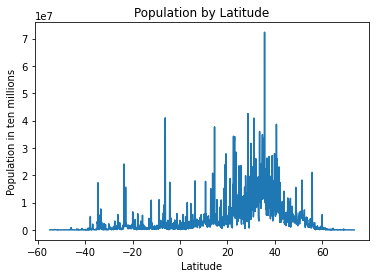

In [684]:
#plotting the population data, in a pivot table the columns are reffered to with a tuple
plt.plot(groupedlat[("sum","population")])
plt.xlabel("Latitude")
plt.ylabel("Population in ten millions")
plt.title("Population by Latitude")

This seems to be the case for the northern hemisphere, but not the south. The southern hemisphere seems to be much more uniform 

In [685]:
cities[cities["city"]=="McMinnville"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
13273,McMinnville,McMinnville,45.2,-123.1918,United States,US,USA,Oregon,Pleb,42062.0,1840019956
23078,McMinnville,McMinnville,35.7,-85.7812,United States,US,USA,Tennessee,Pleb,15570.0,1840015385
